In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.autograd import Variable
%matplotlib inline

In [3]:
# Input your data here to train your network
data_csv = pd.read_csv('data.csv', usecols=[1])

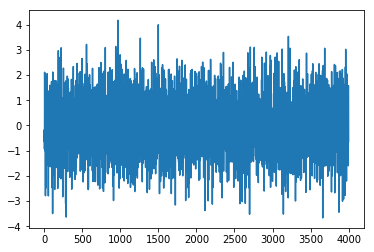

In [4]:
plt.plot(data_csv)

In [5]:
# Preprocessing your data
data_csv = data_csv.dropna()
dataset = data_csv.values
dataset = dataset.astype('float32')
max_value = np.max(dataset)
min_value = np.min(dataset)
scalar = max_value - min_value
dataset = list(map(lambda x: x / scalar, dataset))

In [6]:
# Creating your data set to be used by LSTM - Note the argument look_back
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [7]:
data_X, data_Y = create_dataset(dataset)

In [8]:
# Creating a train and test set
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [9]:
# Reshaping the data to use with LSTM
train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

### Modify the number of hidden layers to 1, 2, and 3 and see the performance of your network, report your results at the end of this notebook as a plot for varying number of hidden layers

In [10]:
# Defining the LSTM module
class lstm_reg(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, num_layers=2):
        super(lstm_reg, self).__init__()
        
        self.rnn = nn.LSTM(input_size, hidden_size, num_layers) # LSTM-rnn
        self.reg = nn.Linear(hidden_size, output_size) #
        
    def forward(self, x):
        x, _ = self.rnn(x) # (seq, batch, hidden)
        s, b, h = x.shape
        x = x.view(s*b, h) 
        x = self.reg(x)
        x = x.view(s, b, -1)
        return x

### See how does the performance of the LSTM network varies with varying learning rate, it is lr here. Try making the learning rate large and small and compare the results. You can assume 1e-2 below is optimum, so you can choose a large and a small value accordingly. Report the results as a plot at the end.

In [11]:
# Configure your network to be executed
#Given Learning Rate
net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
epochs = 10
losses0 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses0[e] += loss.data 

In [12]:
#Large Learning Rate 
net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=3)
epochs = 10
losses1 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses1[e] += loss.data 

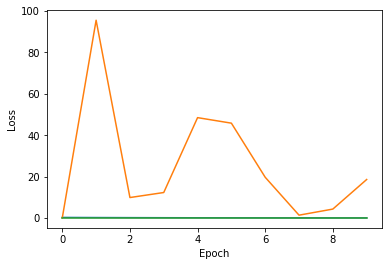

In [13]:
#Small Learning Rate 
net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-8)
epochs = 10
losses2 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses2[e] += loss.data 
plt.plot(losses0)
plt.plot(losses1)
plt.plot(losses2)
#plt.legend(loc="upper left")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

### Considering varying the number of total epochs to 10, 100, 1000 and see the effect on the predictions. Note down the time takes for 10, 100 and 1000 epochs to complete.

In [14]:
# Train your LSTM using the criteria and optimizer defined above
epochs = 10
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    

In [15]:
#1 Hidden Layers
net = lstm_reg(2, 4, num_layers=1)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
epochs = 10
losses3 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses3[e] += loss.data 
print(losses3)

[0.21532418 0.19232984 0.17107506 0.15149739 0.13349196 0.11691894
 0.10161564 0.08741809 0.07420177 0.06192657]


In [16]:
#2 Hidden Layers
net = lstm_reg(2, 4, num_layers=2)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
epochs = 10
losses4 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses4[e] += loss.data 
print(losses4)

[0.23095961 0.19572189 0.16733198 0.14374878 0.12347034 0.1056313
 0.08974633 0.0755435  0.06287938 0.05169892]


[0.21532418 0.19232984 0.17107506 0.15149739 0.13349196 0.11691894
 0.10161564 0.08741809 0.07420177 0.06192657]
[0.23095961 0.19572189 0.16733198 0.14374878 0.12347034 0.1056313
 0.08974633 0.0755435  0.06287938 0.05169892]
[0.02177376 0.02031077 0.02105518 0.02099074 0.02048029 0.02030998
 0.02049178 0.02066779 0.02063661 0.0204662 ]


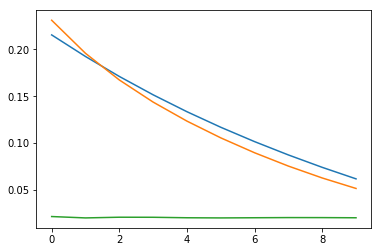

In [18]:
#3 Hidden Layers
net = lstm_reg(2, 4, num_layers=3)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)
epochs = 10
losses5 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    losses5[e] += loss.data 

print(losses3)
print(losses4)
print(losses5)
plt.plot(losses3)
plt.plot(losses4)
plt.plot(losses5)
plt.show()

In [19]:
# Get the network ready to be evaluated
net = net.eval()

In [20]:
# Passing the test data to the network
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data)

In [21]:
pred_test = pred_test.view(-1).data.numpy()

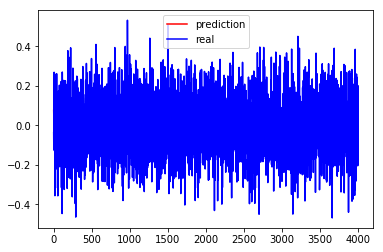

In [22]:
# Plot the real and predicted values
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

In [34]:
#Considering varying the number of total epochs to 10, 100, 1000 and see the effect on the 
#predictions. Note down the time takes for 10, 100 and 1000 epochs to complete.
data_X, data_Y = create_dataset(dataset)

# Creating a train and test set
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

# Reshaping the data to use with LSTM
train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

14.208745956420898


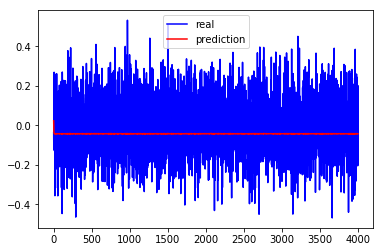

In [24]:
#10 epochs
import time 
start = time.time()

net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

epochs = 10
#losses6 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
net = net.eval()

# Passing the test data to the network
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data)

pred_test = pred_test.view(-1).data.numpy()

#Plot the real and predicted values
plt.plot(dataset, 'b', label='real')
plt.plot(pred_test, 'r', label='prediction')
plt.legend(loc='best')
    
end = time.time()
print(end - start)

130.69092988967896


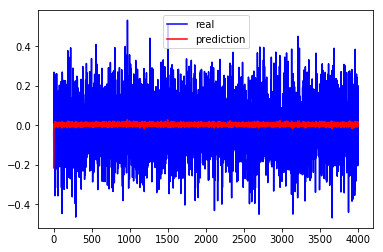

In [28]:
#100 epochs
import time 
start = time.time()

net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

epochs = 100
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
net = net.eval()

# Passing the test data to the network
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data)

pred_test = pred_test.view(-1).data.numpy()

#Plot the real and predicted values
plt.plot(dataset, 'b', label='real')
plt.plot(pred_test, 'r', label='prediction')
plt.legend(loc='best')
    
end = time.time()
print(end - start)

1324.0633759498596


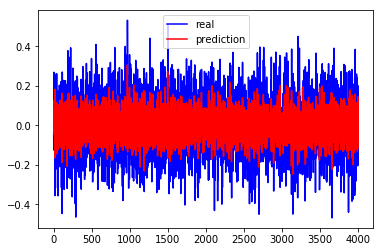

In [35]:
#1000 epochs
import time 
start = time.time()

net = lstm_reg(2, 4)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=1e-2)

epochs = 1000
#losses6 = np.zeros(epochs)
for e in range(epochs):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
  
    out = net(var_x)
    loss = criterion(out, var_y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
net = net.eval()

# Passing the test data to the network
data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = net(var_data)

pred_test = pred_test.view(-1).data.numpy()

#Plot the real and predicted values
plt.plot(dataset, 'b', label='real')
plt.plot(pred_test, 'r', label='prediction')
plt.legend(loc='best')
    
end = time.time()
print(end - start)

The 1000 epochs has the closest prediction vs. real. 